# Lab 1 - Univariate and Multivariate analysis

## Content identification

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np
import seaborn as sns
from utils import dataPreparationFunctions as dataPrepare, graphFunctions as graph

register_matplotlib_converters()

In [3]:
data = pd.read_csv('../datasets/pd_speech_features.csv', header=1, sep=',', decimal='.')
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
data.shape

(756, 755)

In [5]:
len(data[data.gender==1])

390

In [6]:
len(data[data.gender==0])

366

According to the dataset description: There are 3 records of each patient, and the data is divided in a study group (188 patients, which 107 are men and 81 women) and a control group (64 people without the disease, which 23 are men and 41 women).

Thinking about training and testing, leaving the three records of each could make the model biased since we could train with two records of the patient and then test with the one left. Because of this, every 3 records will be summarize by their mean.

In [7]:
data = data.groupby(data.id).mean()
data.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,234.333333,0.008220,0.000073,0.001963,0.000016,...,1.561733,2.862000,12.293333,9.717500,9.055300,6.259100,4.021533,4.164333,22.961700,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,211.000000,0.008884,0.001849,0.005790,0.000050,...,4.918567,4.827133,6.117633,8.599667,5.737233,7.933133,5.490533,4.941833,4.467233,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,318.333333,0.006041,0.000104,0.002217,0.000013,...,41.129400,31.201933,14.584467,5.446800,3.462000,4.772067,9.176633,11.848100,5.552367,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,492.000000,0.003913,0.000042,0.000757,0.000003,...,1.677633,1.908400,2.842167,3.493867,3.282433,3.085267,3.184433,4.032933,22.773633,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,361.666667,0.005622,0.002023,0.003593,0.000021,...,4.104600,4.285233,2.953200,2.799933,2.645100,2.811367,7.268333,13.338833,63.766900,1.0


In [8]:
data.shape

(252, 754)

## Variables Type and Domain

In [9]:
data.dtypes

gender                       float64
PPE                          float64
DFA                          float64
RPDE                         float64
numPulses                    float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                        float64
Length: 754, dtype: object

In [10]:
cat_vars = data.select_dtypes(include='object')
for att in cat_vars:
    print(att, data[att].unique())

There are no object type in the dataset, only numerical ones

## Missing values

In [11]:
mv, count_na = dataPrepare.get_missing_values(data)
print('Total of missing values on dataset:', count_na)

Total of missing values on dataset: 0


## Variables Distribuition

In [12]:
data.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500743,0.119996,0.066284,0.127195,93.227761,93.399366,0.001700,0.000534,0.002385,2.074856e-05,...,35.525687,25.893491,20.057960,16.069665,14.661894,13.354262,12.378443,11.523976,29.458776,0.436146
min,0.000000,0.314347,0.555967,0.193853,88.666667,82.333333,0.003273,0.000014,0.000270,9.106667e-07,...,1.526233,1.579100,1.867967,2.203400,1.949200,2.079533,2.330300,2.283500,2.890800,0.000000
25%,0.000000,0.691873,0.651182,0.393635,257.333333,256.333333,0.005082,0.000059,0.001078,5.901667e-06,...,2.820458,4.473508,4.436750,3.699583,3.380817,3.651750,4.897958,4.978075,5.056667,0.000000
50%,1.000000,0.802037,0.699407,0.483117,317.333333,316.166667,0.006092,0.000103,0.001523,9.765000e-06,...,8.644883,10.489583,9.489333,6.323717,5.392867,6.909650,9.492500,10.598483,17.294033,1.000000
75%,1.000000,0.823919,0.752511,0.575137,383.666667,382.166667,0.007510,0.000535,0.002617,1.956750e-05,...,38.554292,35.420017,26.345942,15.808783,14.024783,15.095608,23.127600,23.136125,57.496050,1.000000
max,1.000000,0.869927,0.851113,0.826477,603.333333,596.000000,0.011608,0.002675,0.022580,1.902327e-04,...,187.323300,146.324000,107.571533,84.135067,66.894200,63.020433,56.747467,47.937033,94.838167,1.000000


There are so many features that analysing one by one may not be worth, especially because a lot of variables have similar names, so we will reject variables according to their correlation with each other.

Most of the analysis in this notebook will be based on the threshold of 0.8, but, in the end, it will be created datasets with threshold of 0.9 and 0.7 to compair their accuracy in some models. 

In [13]:
# dataframe with only the non rejected variables
new_data = dataPrepare.reject_variables(data, 0.8)
new_data.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,...,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,0.000073,0.001963,0.071003,0.976658,66.691702,...,3.063067,2.100667,1.756133,1.694267,2.437633,1.591700,1.546500,1.561733,12.293333,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,0.001849,0.005790,0.062710,0.950272,75.679080,...,1.935867,2.484133,2.157100,1.862933,1.831233,1.881900,7.049367,4.918567,6.117633,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,0.000104,0.002217,0.040953,0.988194,75.115737,...,1.735567,1.589467,1.673333,2.301967,1.577067,1.590333,1.581967,41.129400,14.584467,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,0.000042,0.000757,0.049467,0.991718,70.894192,...,2.358100,2.058267,2.148733,2.357367,4.138300,5.676767,2.382533,1.677633,2.842167,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,0.002023,0.003593,0.159193,0.895530,57.435886,...,2.706200,2.167767,1.903700,1.897600,3.384267,3.614567,3.881267,4.104600,2.953200,1.0


In [14]:
baseline = data.iloc[:,0:23]
new_baseline = dataPrepare.reject_variables(baseline, 0.8)
new_baseline.columns

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'stdDevPeriodPulses',
       'locPctJitter', 'locShimmer', 'meanAutoCorrHarmonicity',
       'minIntensity'],
      dtype='object')

To understand better the distribuition of the data, two types graphics will be plotted: histograms (with and without a Gaussian and an exponencial to compare) and boxplots. These way, it'll be possible to look for outliers and for similar distributions.
Because of the high number of variables, the ones choosen to be plotted was: the Baseline Features not rejected by the Profile Report and at least one of each group (the first line of the csv was considered as groups):
    - No group: 'gender', 'class'
    - Baseline Features: 'PPE', 'DFA', 'RPDE', 'numPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locShimmer', 'meanAutoCorrHarmonicity'
    - Intensity Parameters: 'minIntensity'
    - Formant Frequencies: 'f1'
    - Bandwidth Parameters: 'b1'
    - Vocal Fold: 'GQ_prc5_95', 'GNE_mean', 'VFER_NSR_SEO'
    - MFCC: 'mean_Log_energy'
    - Wavelet Features: 'Ea'
    - TQWT Features: 'tqwt_energy_dec_1'
Plotting all the features and analyzing would give more information, but, since it's way too many, the analysis of the others features will be more superficial

In [15]:
analysis = new_data[['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locShimmer', 'meanAutoCorrHarmonicity', 'minIntensity', 'f1', 'b1', 'GQ_prc5_95', 'GNE_mean', 'VFER_NSR_SEO', 'mean_Log_energy', 'Ea', 'tqwt_energy_dec_1', 'class']]
analysis.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,f1,b1,GQ_prc5_95,GNE_mean,VFER_NSR_SEO,mean_Log_energy,Ea,tqwt_energy_dec_1,class
id,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,0.000073,0.001963,0.071003,0.976658,66.691702,550.716984,106.648472,0.80282,1.014870,1.318667,9.280100,99.999767,0.000024,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,0.001849,0.005790,0.062710,0.950272,75.679080,832.920994,293.239513,0.89839,0.841437,1.292733,9.933833,99.098867,0.000045,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,0.000104,0.002217,0.040953,0.988194,75.115737,683.269240,122.703801,1.00000,0.833660,1.346033,9.894100,99.996000,0.000076,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,0.000042,0.000757,0.049467,0.991718,70.894192,712.242460,106.489904,1.00000,1.631433,1.367367,9.667233,99.999300,0.000017,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,0.002023,0.003593,0.159193,0.895530,57.435886,504.376144,652.363445,0.91351,0.840813,1.208767,9.369700,99.998367,0.000425,1.0


<Figure size 432x288 with 0 Axes>

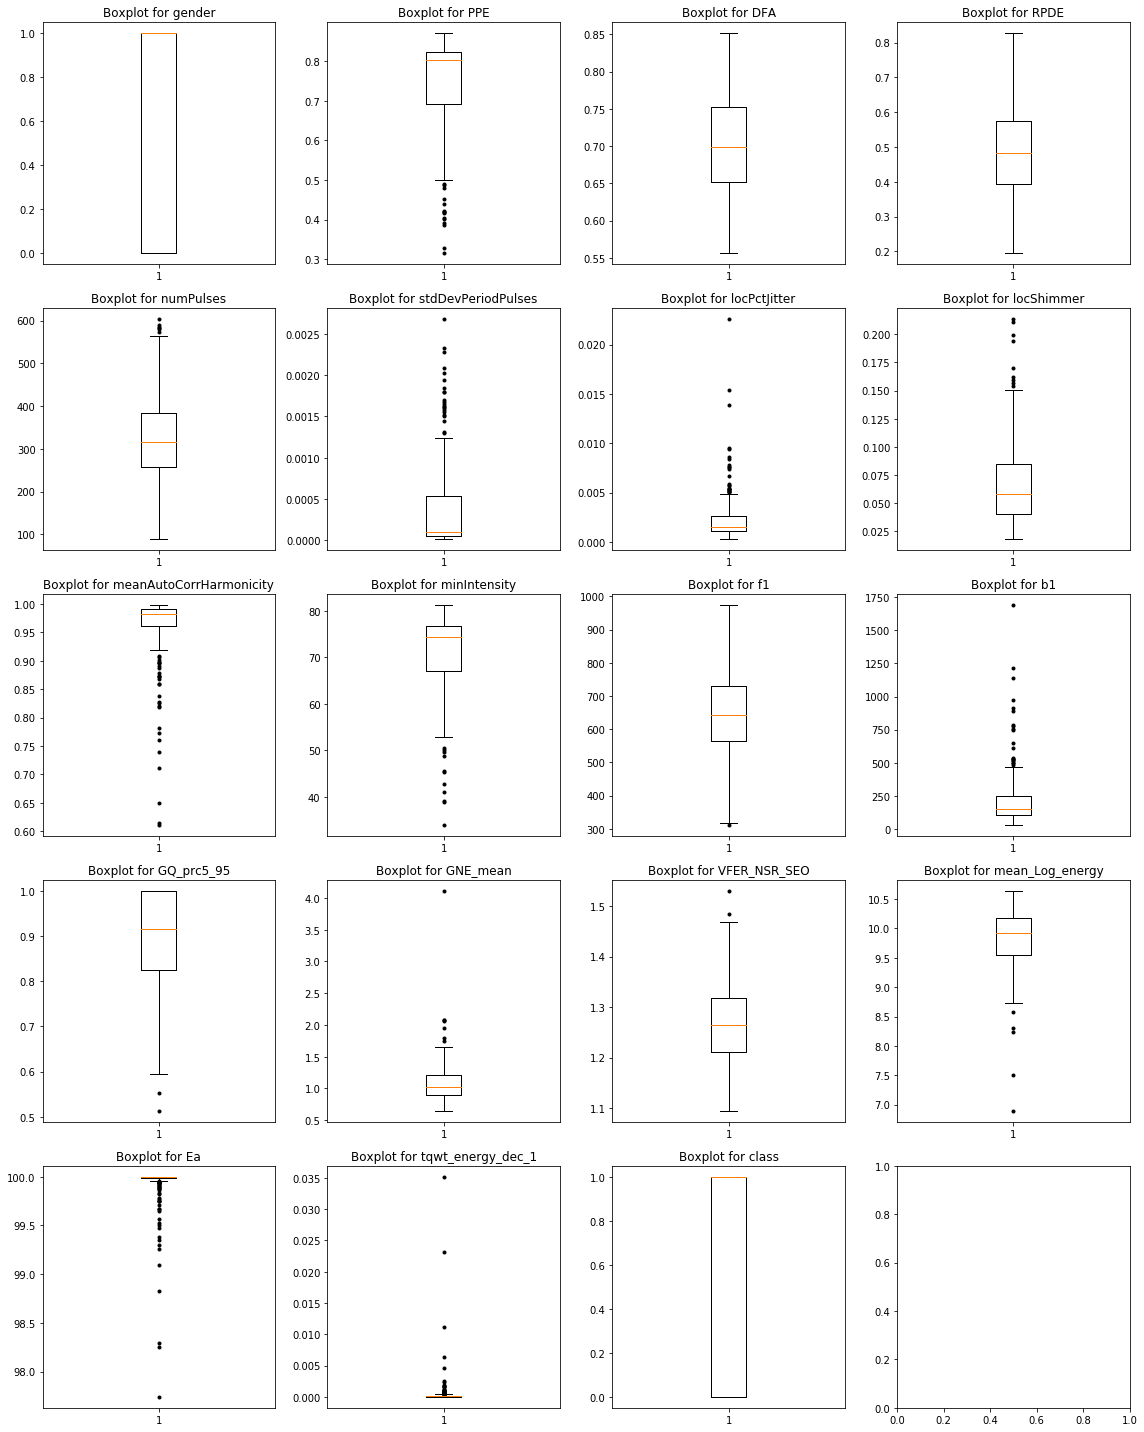

In [16]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = graph.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(analysis[columns[n]].dropna().values, sym='k.')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

There are a lot of outliers and we don't have too many data, so it's not possible to ignore these records.

<Figure size 432x288 with 0 Axes>

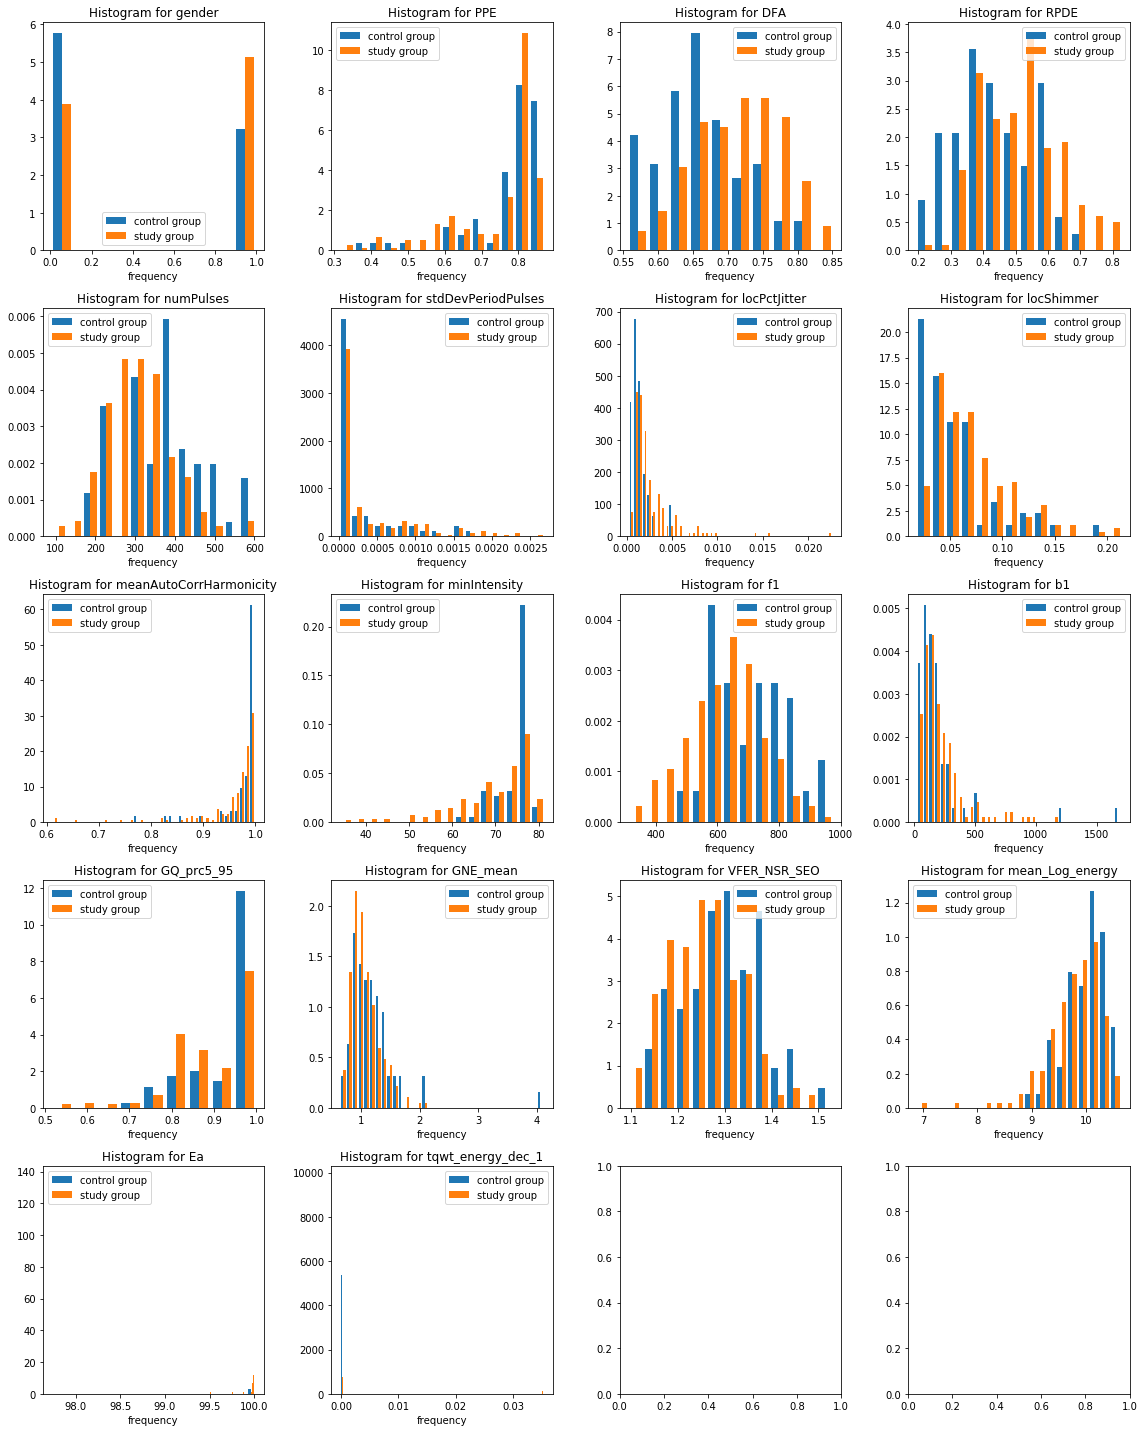

In [17]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = graph.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0 , 0
for n in range(len(columns)):
    if (columns[n] == 'class'):
        continue
    graph.histogram_with_two_classes(axs[i, j], analysis[analysis['class']==0][columns[n]].dropna().values, analysis[analysis['class']==1][columns[n]].dropna().values, 'Histogram for %s'%columns[n], 'frequency', label_classes=['control group', 'study group'])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Here we can have an idea of which variables can be used to differentiate the target class. For example, DFA and RPDE seems to have different distribuitions on people with and without the Parkinson.
It's possible to calculate statistically the significance of this difference. It may be explored calculating the p-value later.

<Figure size 432x288 with 0 Axes>

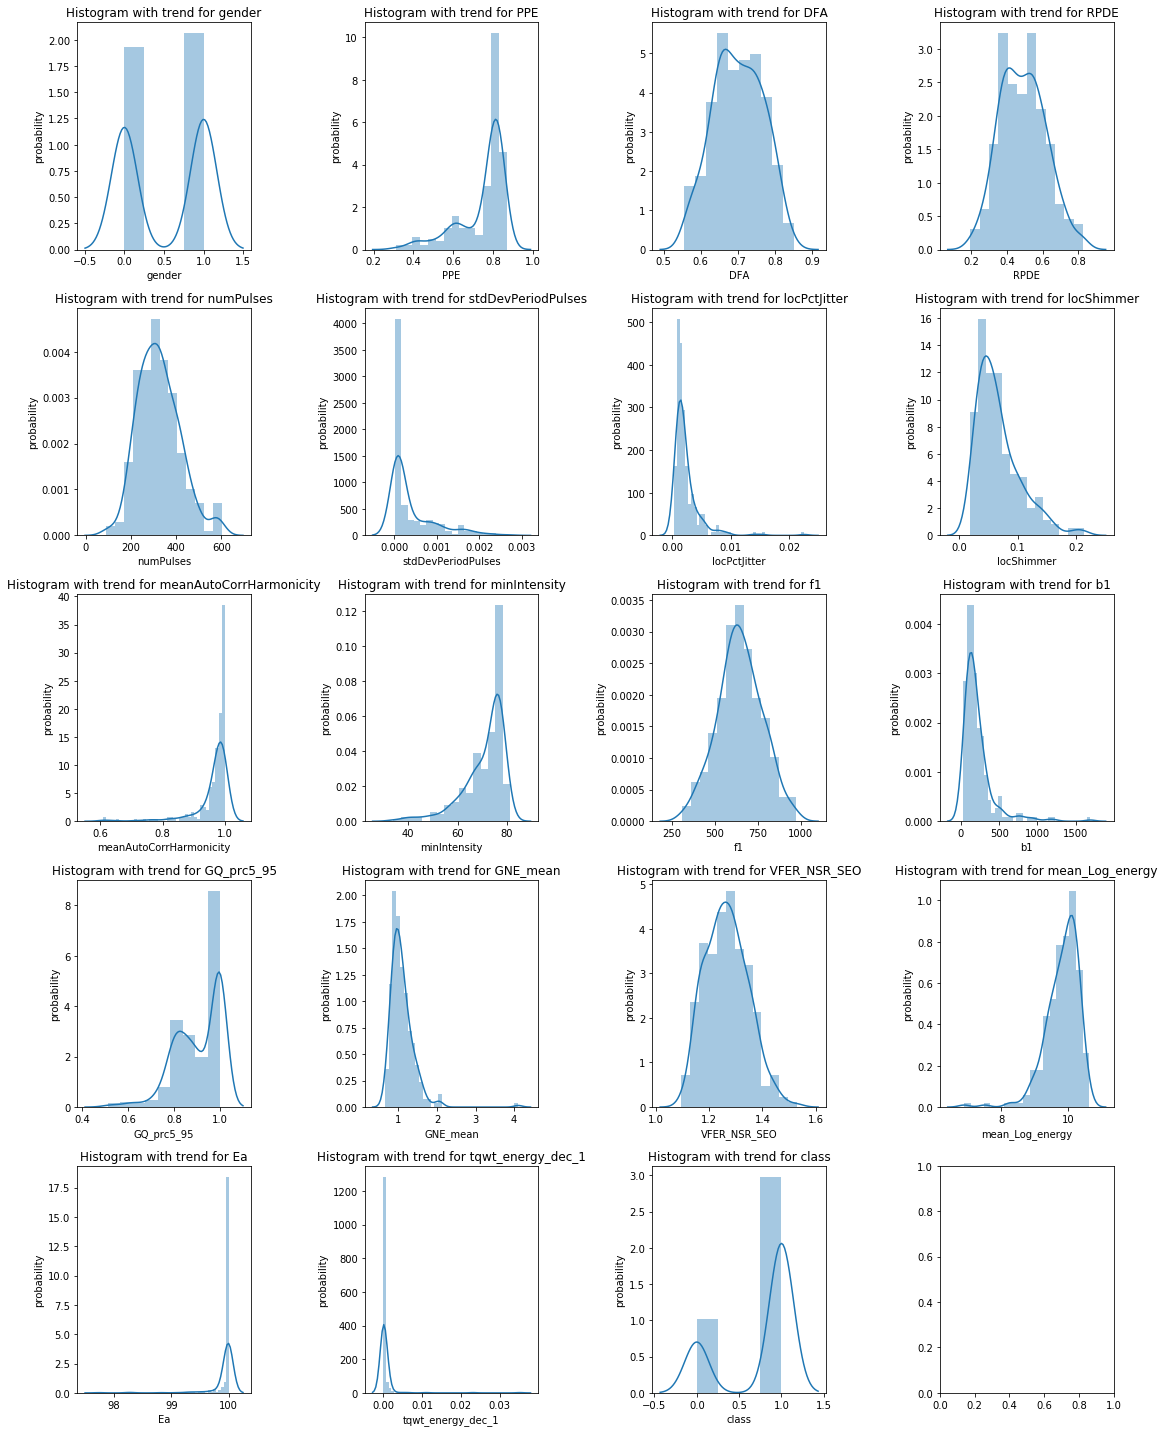

In [18]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = graph.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("probability")
    sns.distplot(analysis[columns[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

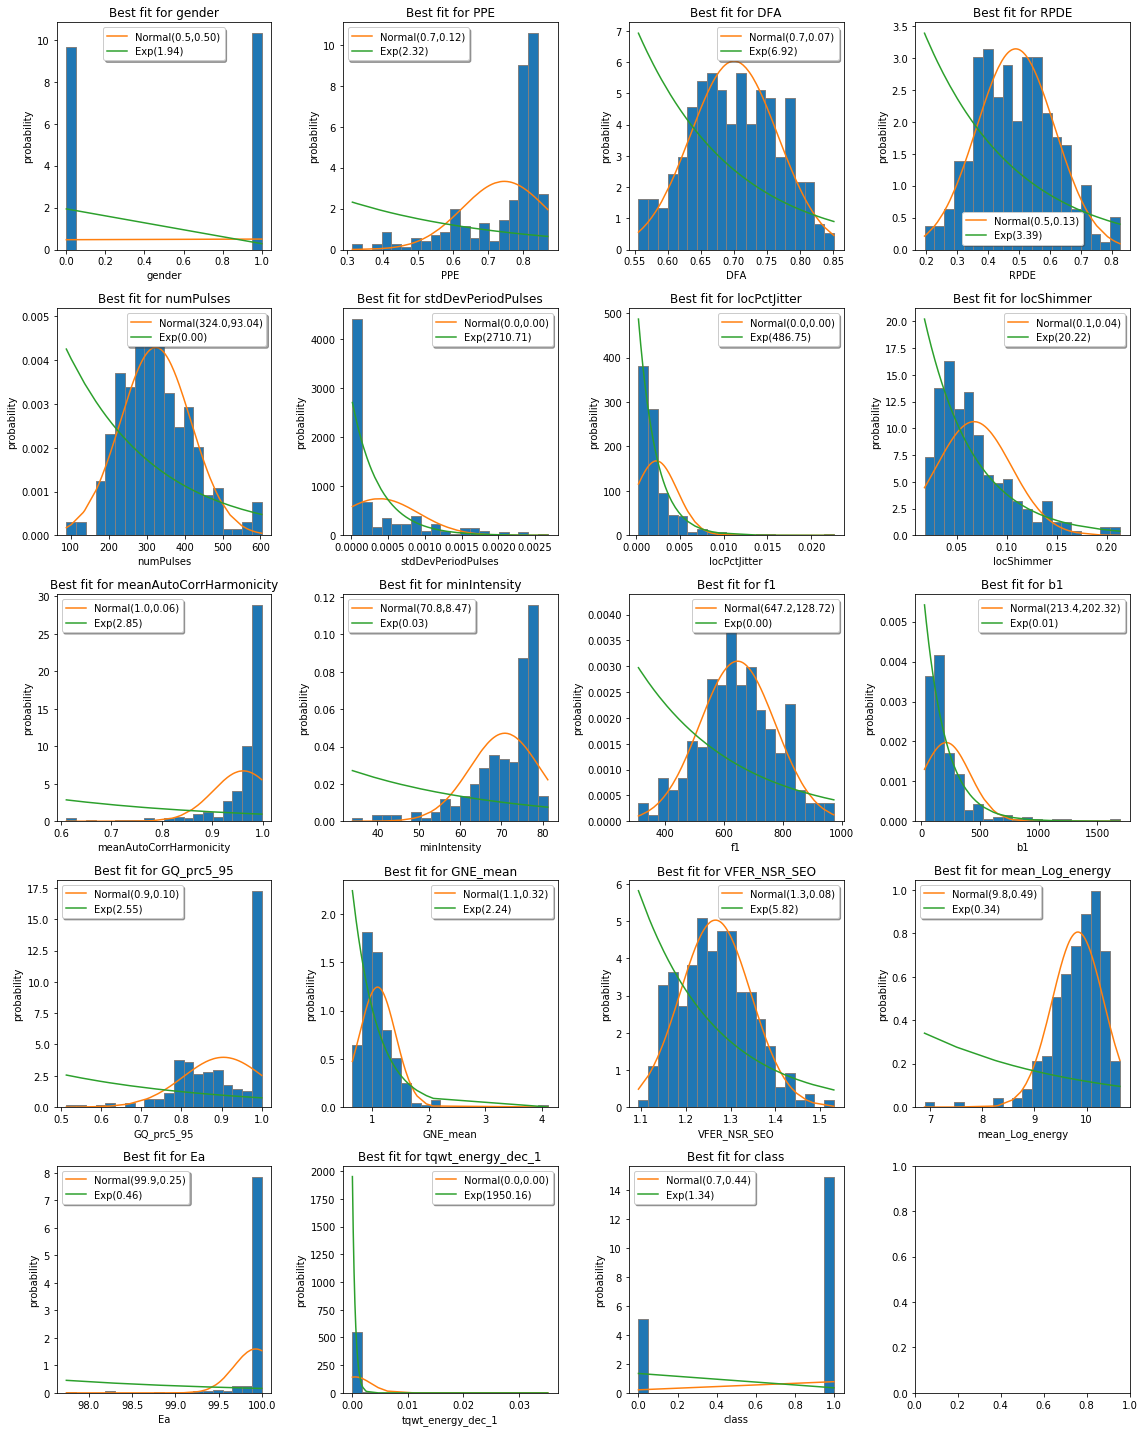

In [19]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = graph.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    graph.histogram_with_distributions(axs[i, j], analysis[columns[n]].dropna(), title='Best fit for %s'%columns[n], xlabel=columns[n], ylabel='probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Knowing the distributions can help to decide same parameters of models, for example, the normal estimator of Naive Bayes probably will work better than the Bernoulli.

Finally, it'll be analyzed the effects of granularity for each variable.

<Figure size 432x288 with 0 Axes>

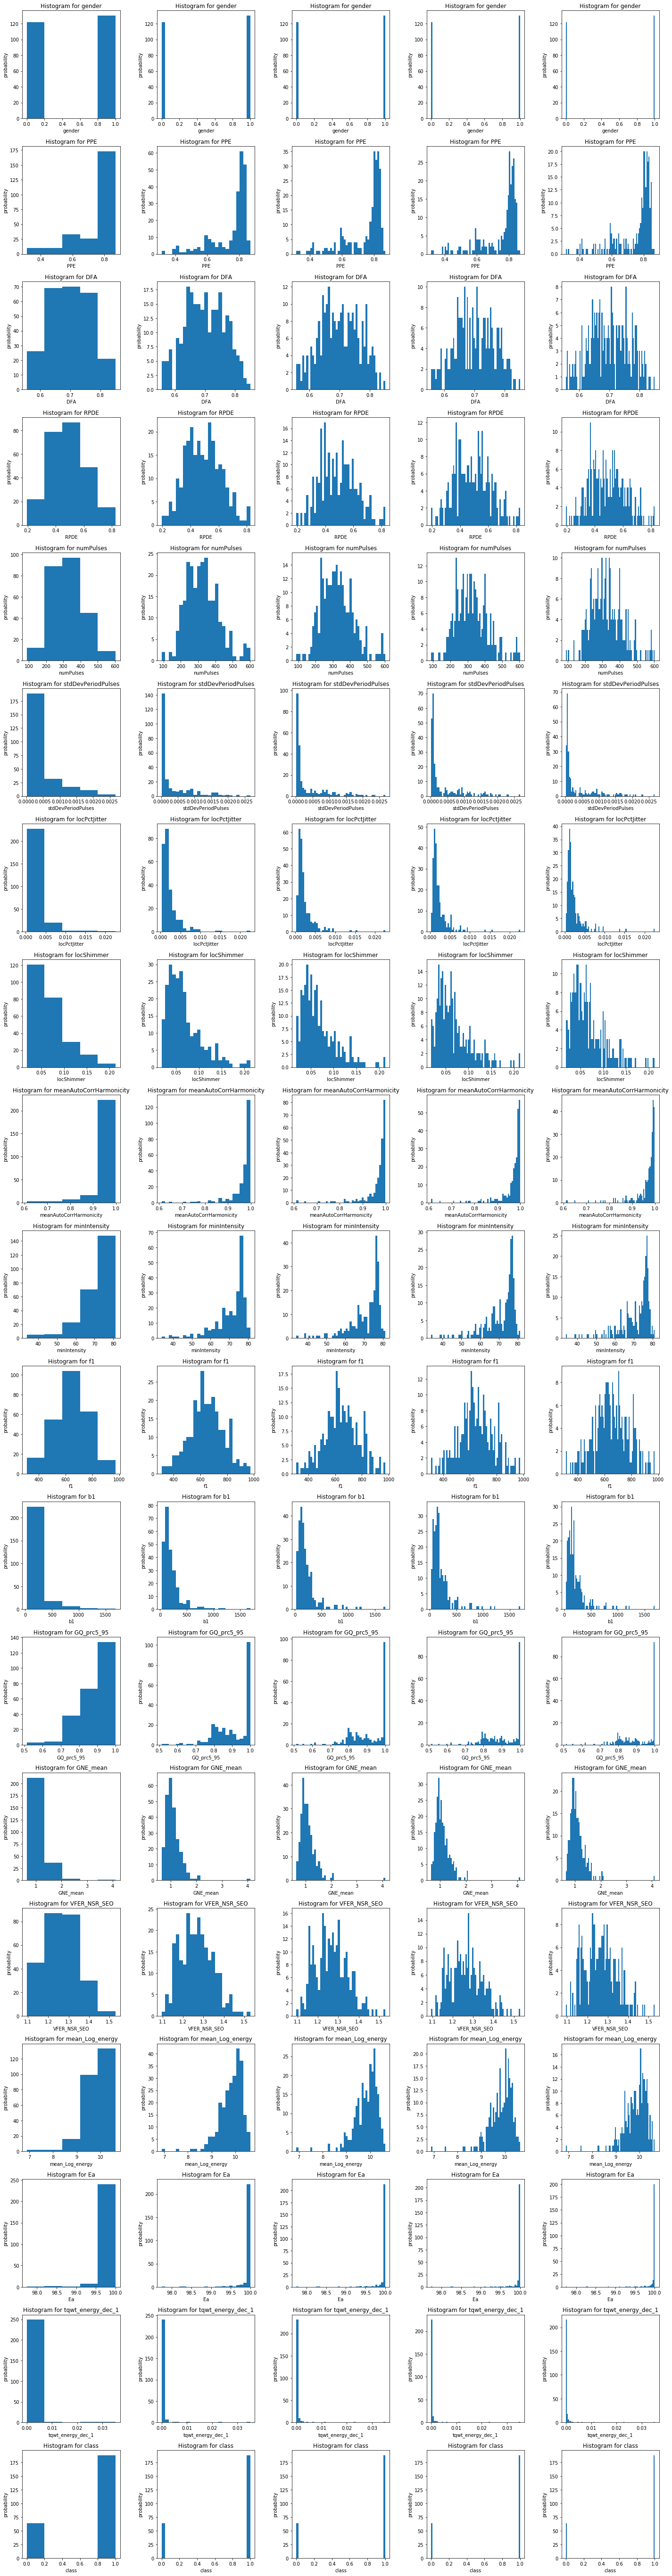

In [20]:
columns = analysis.select_dtypes(include='number').columns
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        graph.histogram(axs[i, j], analysis[columns[i]].dropna().values, 'Histogram for %s'%columns[i], columns[i], 'probability', bins[j])
fig.tight_layout()
plt.show()

## Multivariate analysis

Here, we'll see the correlation and the sparsity of variables to try to get insights about which features can differentiate better the target.

In [21]:
multivar_analysis = dataPrepare.reject_variables(data, 0.8)
print('Number of variabels with correlation lower than 0.8:', len(multivar_analysis))

Number of variabels with correlation lower than 0.8: 252


Heatmap for the baseline to ilustrate the matrix

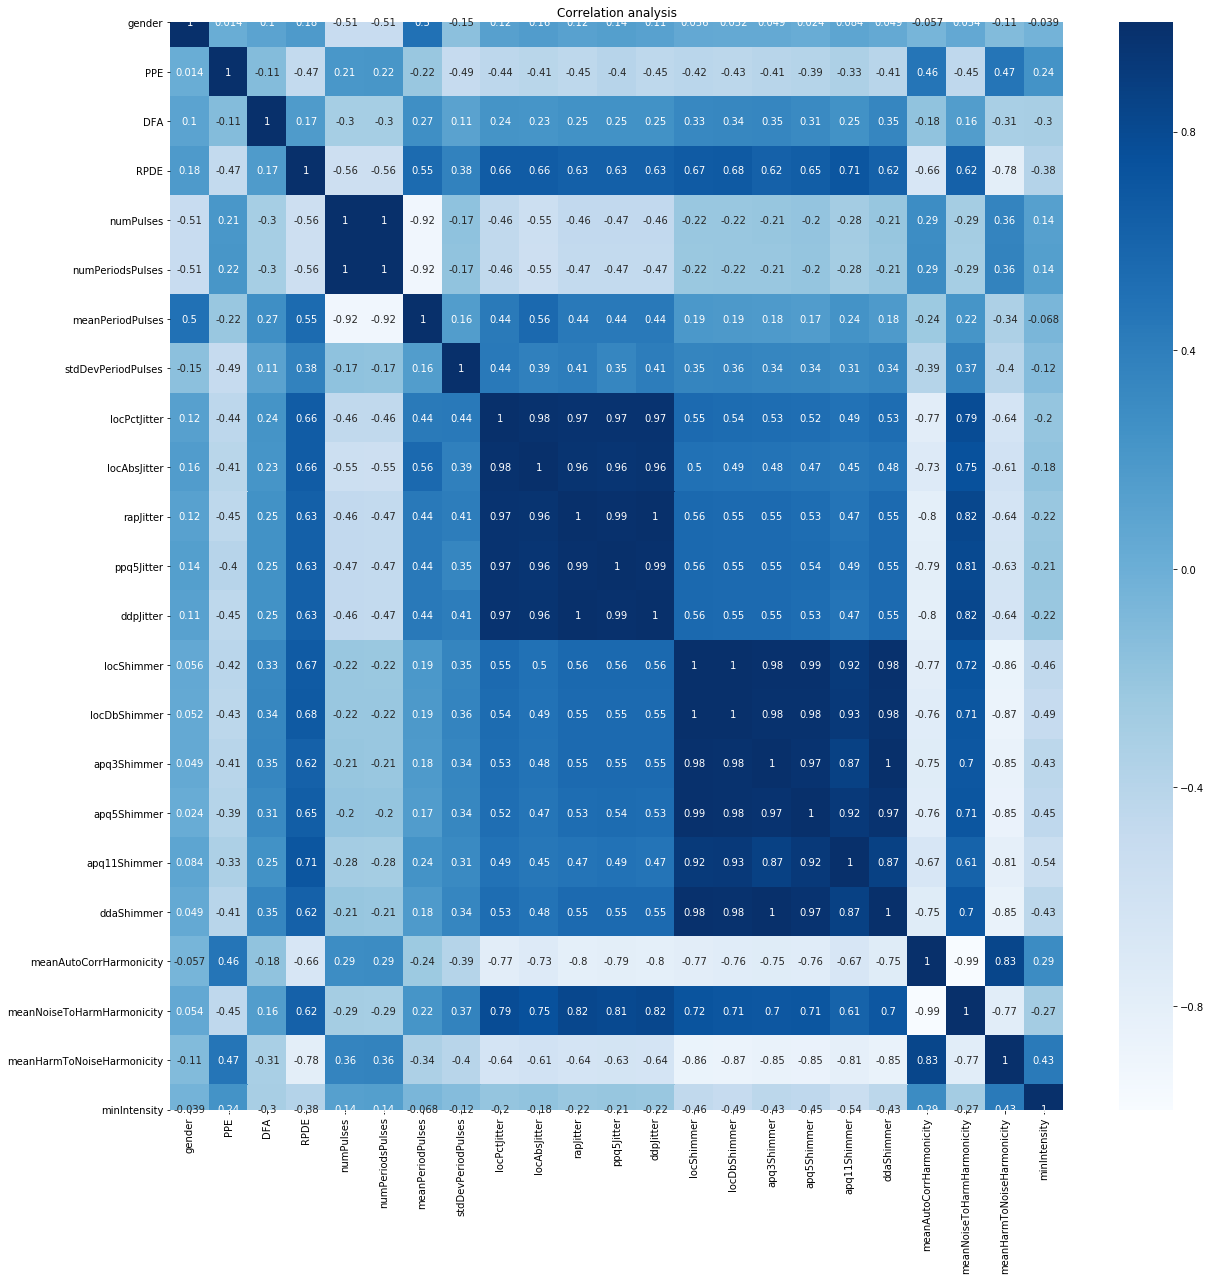

In [22]:
fig = plt.figure(figsize=[20, 20])
baseline_corr = baseline.corr()
sns.heatmap(baseline_corr, xticklabels=baseline_corr.columns, yticklabels=baseline_corr.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

That's a visual way to know the variables highly correlated (some even with correlation equal to 1).

In [23]:
multivar_analysis.to_csv('../datasets/pd_data_exploration.csv')
multivar_analysis.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,...,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,0.000073,0.001963,0.071003,0.976658,66.691702,...,3.063067,2.100667,1.756133,1.694267,2.437633,1.591700,1.546500,1.561733,12.293333,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,0.001849,0.005790,0.062710,0.950272,75.679080,...,1.935867,2.484133,2.157100,1.862933,1.831233,1.881900,7.049367,4.918567,6.117633,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,0.000104,0.002217,0.040953,0.988194,75.115737,...,1.735567,1.589467,1.673333,2.301967,1.577067,1.590333,1.581967,41.129400,14.584467,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,0.000042,0.000757,0.049467,0.991718,70.894192,...,2.358100,2.058267,2.148733,2.357367,4.138300,5.676767,2.382533,1.677633,2.842167,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,0.002023,0.003593,0.159193,0.895530,57.435886,...,2.706200,2.167767,1.903700,1.897600,3.384267,3.614567,3.881267,4.104600,2.953200,1.0


According to the histograms divided by control and study group (showed earlier in this notebook), we could see that some variables may help to differenciate them, so we'll plot a graph to analyse de sparsity 2 by 2.

<Figure size 432x288 with 0 Axes>

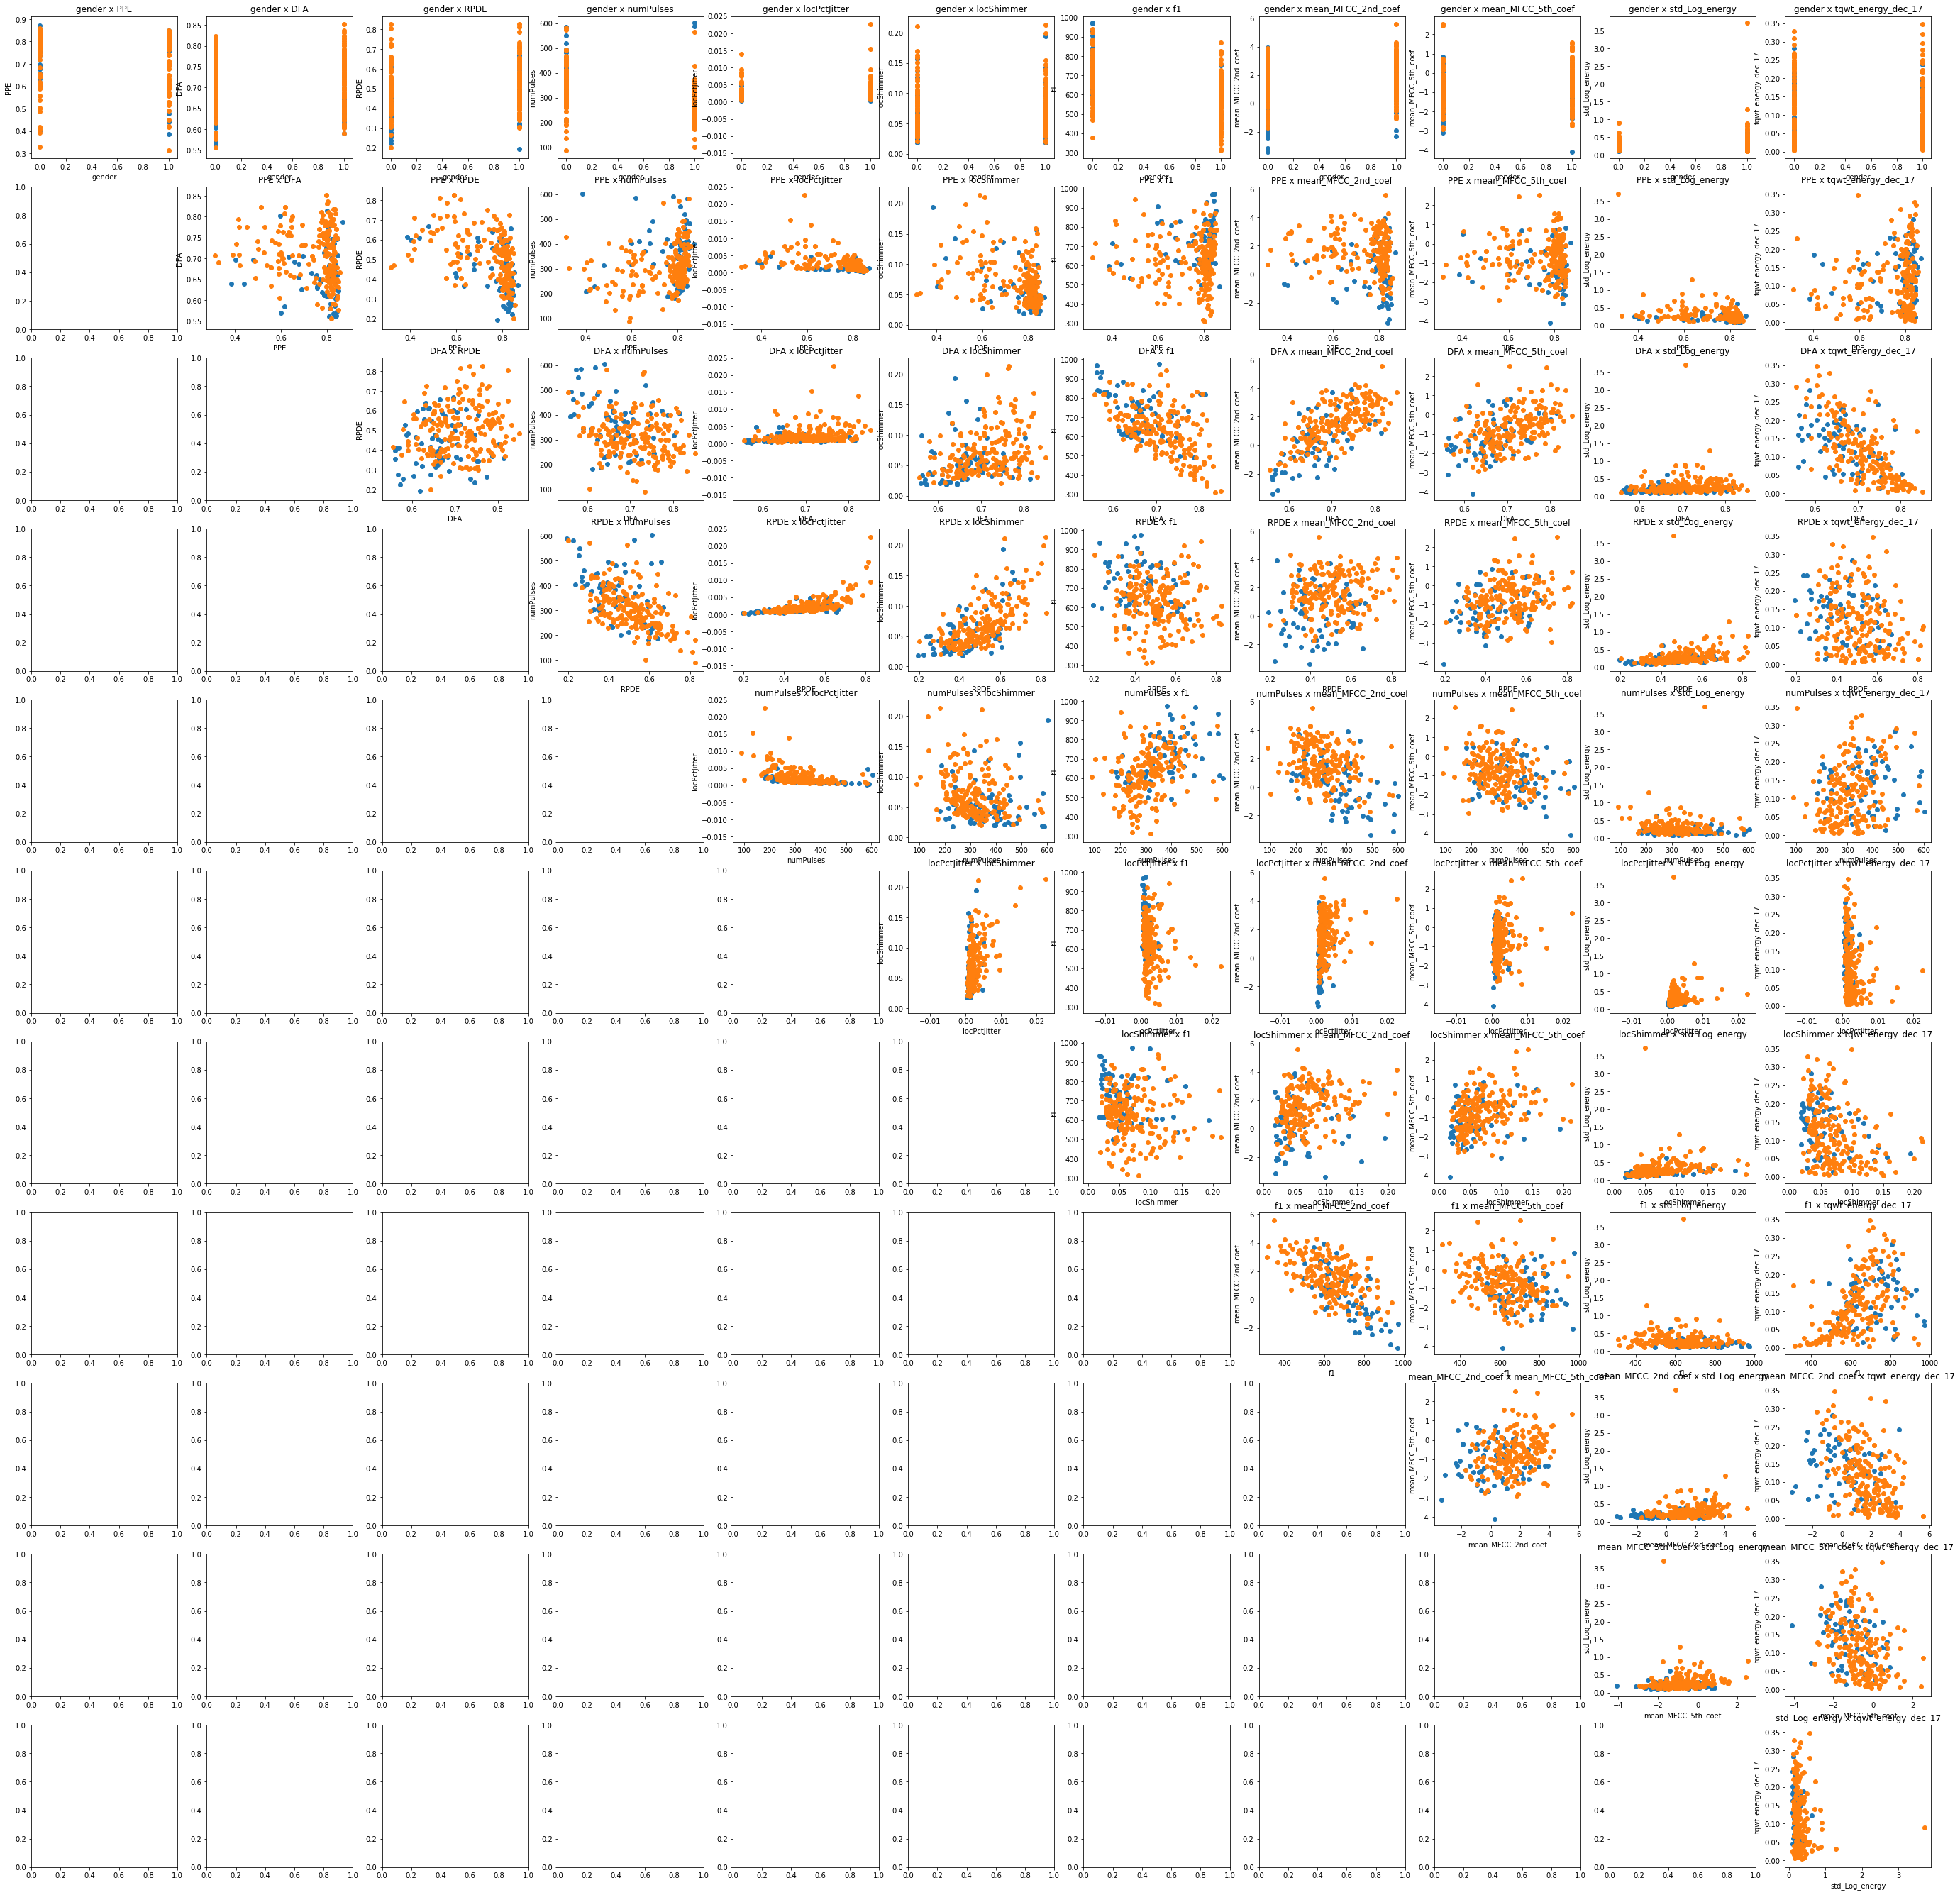

In [24]:
sparsity = multivar_analysis[['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'locPctJitter', 'locShimmer', 'f1', 'mean_MFCC_2nd_coef', 'mean_MFCC_5th_coef', 'std_Log_energy', 'tqwt_energy_dec_17', 'class']].columns
plt.figure()
rows, cols = len(sparsity)-1, len(sparsity)-1
figs, axs = plt.subplots(rows-1, cols-1, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(sparsity)-1):
    var1 = sparsity[i]
    for j in range(i+1, len(sparsity)-1):
        var2 = sparsity[j]
        graph.scatter_with_two_classes(axs[i, j-1], multivar_analysis[multivar_analysis['class']==0], multivar_analysis[multivar_analysis['class']==1], var1, var2)
fig.tight_layout()
plt.show()

The scatter plot shows that a good part of the space represented by the variables are covered (not sparse), but there are not clear clusters of a single class. If we dig more in the data, some interesting relations could appear, but, once again, the high dimensionality of the data will make us go already to the next step: Data Preparation.

## Extra Datasets
As said before, the datasets with other thresholds for rejection variables will be created to test the models with them as well.

In [25]:
multivar_analysis_7 = dataPrepare.reject_variables(data, 0.7)
multivar_analysis_7.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,minIntensity,f1,...,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_28,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,0.000073,0.001963,0.071003,66.691702,550.716984,...,25.200667,4.153100,3.063067,2.100667,1.756133,1.694267,2.437633,1.591700,1.561733,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,0.001849,0.005790,0.062710,75.679080,832.920994,...,6.284467,5.156433,1.935867,2.484133,2.157100,1.862933,1.831233,1.881900,4.918567,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,0.000104,0.002217,0.040953,75.115737,683.269240,...,3.200700,2.800067,1.735567,1.589467,1.673333,2.301967,1.577067,1.590333,41.129400,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,0.000042,0.000757,0.049467,70.894192,712.242460,...,2.533800,2.258433,2.358100,2.058267,2.148733,2.357367,4.138300,5.676767,1.677633,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,0.002023,0.003593,0.159193,57.435886,504.376144,...,3.850567,3.086800,2.706200,2.167767,1.903700,1.897600,3.384267,3.614567,4.104600,1.0


In [26]:
multivar_analysis_9 = dataPrepare.reject_variables(data, 0.9)
multivar_analysis_9.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,meanHarmToNoiseHarmonicity,...,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,0.000073,0.001963,0.071003,0.976658,19.381000,...,1.694267,2.437633,1.591700,1.546500,1.561733,2.862000,12.293333,4.021533,22.961700,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,0.001849,0.005790,0.062710,0.950272,18.032667,...,1.862933,1.831233,1.881900,7.049367,4.918567,4.827133,6.117633,5.490533,4.467233,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,0.000104,0.002217,0.040953,0.988194,20.449333,...,2.301967,1.577067,1.590333,1.581967,41.129400,31.201933,14.584467,9.176633,5.552367,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,0.000042,0.000757,0.049467,0.991718,23.470000,...,2.357367,4.138300,5.676767,2.382533,1.677633,1.908400,2.842167,3.184433,22.773633,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,0.002023,0.003593,0.159193,0.895530,10.796667,...,1.897600,3.384267,3.614567,3.881267,4.104600,4.285233,2.953200,7.268333,63.766900,1.0


In [27]:
multivar_analysis_7.to_csv('../datasets/pd_data_exploration_7.csv')
multivar_analysis_9.to_csv('../datasets/pd_data_exploration_9.csv')